<a href="https://colab.research.google.com/github/leeovalle/cifar10Training/blob/main/Copy_of_assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FROM LECTURE VIDEO

(50000, 32, 32, 3)
samples of the training images


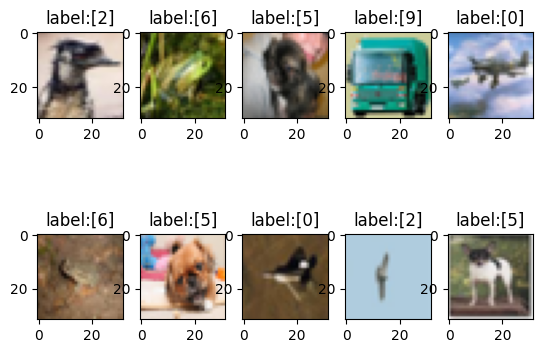

In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from keras.utils import to_categorical

def img_plt(images, labels):
  plt.figure()
  for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(images[i-1,:,:])
    plt.title('label:'+str(labels[i-1]))
  plt.show()

def feat_plot(features,labels,classes):
  for class_i in classes:
    plt.plot(features[labels[:]==classes[class_i],0], features[labels[:]==classes[class_i],1],'o',markersize=15)
  plt.xlabel('x: feature 1')
  plt.ylabel('y: feature 2')
  plt.legend(['class'+str(classes[class_i]) for class_i in classes])
  plt.show()

def acc_fun(labels_actual, labels_pred):
  acc = np.sum(labels_actual == labels_pred)/len(labels_actual)*100
  return acc

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes=np.arange(10)
print(x_train.shape)

#(A)
#selecting 20% of trainng data as the calidation set
#shuffling training data
num_train_img=x_train.shape[0]
train_ind=np.arange(0,num_train_img)
train_ind_s=np.random.permutation(train_ind)
x_train=x_train[train_ind_s,:,:,:]
y_train=y_train[train_ind_s]
#selecting 20% of the training images for validation
x_val=x_train[0:int(0.2*num_train_img),:,:,:]
y_val=y_train[0:int(0.2*num_train_img)]
#the rest of the training set
x_train=x_train[int(0.2*num_train_img):,:,:]
y_train=y_train[int(0.2*num_train_img):]

print('samples of the training images')
img_plt(x_train[0:10,:,:,:], y_train[0:10])

#(B)
#scailing the images
x_train=x_train.astype('float32')
x_val=x_val.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_val/=255
x_test/=255

#(C)
#convert class vectors to binary class
y_train_c = to_categorical(y_train,len(classes))
y_val_c = to_categorical(y_val, len(classes))
y_test_c = to_categorical(y_test,len(classes))

x_train shape: (50000, 32, 32, 3)
y_train_c shape: (50000, 10)
x_val shape: (10000, 32, 32, 3)
y_val_c shape: (10000, 10)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_27 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_28 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_29 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3861 - loss: 1.6720

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.3862 - loss: 1.6718 - val_accuracy: 0.6115 - val_loss: 1.0927
Epoch 2/50
1559/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6393 - loss: 1.0131

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6394 - loss: 1.0130 - val_accuracy: 0.6745 - val_loss: 0.9295
Epoch 3/50
1552/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7120 - loss: 0.8118

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7120 - loss: 0.8117 - val_accuracy: 0.7248 - val_loss: 0.7884
Epoch 4/50
1560/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7564 - loss: 0.6886

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7564 - loss: 0.6886 - val_accuracy: 0.7327 - val_loss: 0.7872
Epoch 5/50
1555/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7927 - loss: 0.5819

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7927 - loss: 0.5820 - val_accuracy: 0.7628 - val_loss: 0.7192
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8252 - loss: 0.4966 - val_accuracy: 0.7593 - val_loss: 0.7355
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8527 - loss: 0.4186 - val_accuracy: 0.7642 - val_loss: 0.7560
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8750 - loss: 0.3543 - val_accuracy: 0.7644 - val_loss: 0.7983
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8911 - loss: 0.3092 - val_accuracy: 0.7606 - val_loss: 0.8222
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9054 - loss: 0.2698 - val_accuracy: 0.7675 - val_loss: 0.8540
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9150 - loss: 0.2367 - val_accuracy: 0.7588 - val_loss: 0.9411
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9209 - loss: 0.2265 - va

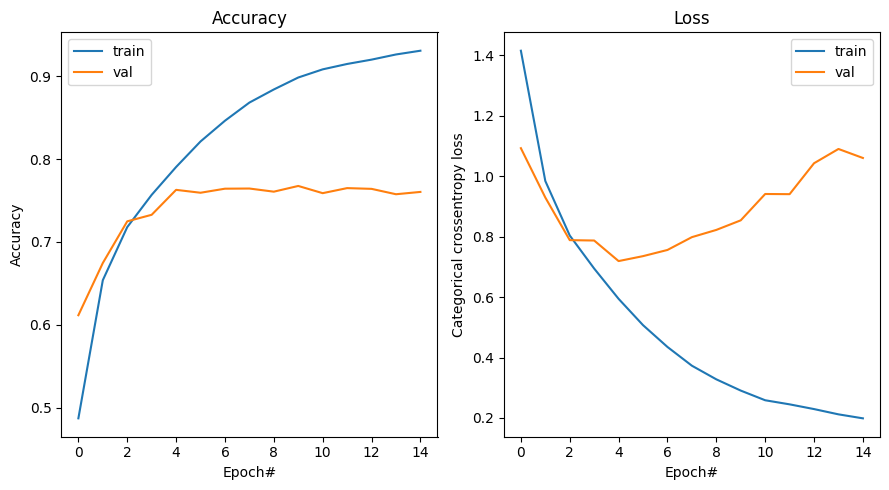

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8777 - loss: 0.3694
Total loss on training set: 0.36812153458595276
Accuracy of training set: 0.8805999755859375
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7633 - loss: 0.7128
Total loss on validation set: 0.7191532254219055
Accuracy of validation set: 0.7627999782562256
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Validation Accuracy: 0.7628
Validation Confusion Matrix:
 [[777  10  44  29  30   6   9   8  53  34]
 [ 13 852   1  10   2   8  13   1  25  75]
 [ 60   4 631  50  92  59  71  17  11   5]
 [ 13   2  57 588  63 176  62  23   7   9]
 [ 11   2  66  38 738  32  62  44   5   2]
 [  8   0  41 148  45 695  28  29   4   2]
 [  6   1  37  51  18  23 856   1   4   3]
 [ 10   0  36  42  54  66   6 778   5   3]
 [ 46  21  13  12   9   9   9   6 865  10]
 [ 19  52   7  25   6   8   6  10  19 848]]
Validation Recall: 0.7628


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import cifar10
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import os

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
num_classes = 10
y_train_c = to_categorical(y_train, num_classes)
y_val_c = to_categorical(y_val, num_classes)
classes = [f'class_{i}' for i in range(num_classes)]

# Verify data shapes
print('x_train shape:', x_train.shape)
print('y_train_c shape:', y_train_c.shape)
print('x_val shape:', x_val.shape)
print('y_val_c shape:', y_val_c.shape)

# Plotting function
def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
    epochs = np.arange(len(loss_train))
    plt.figure(figsize=[9, 5])

    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy_train, label='train')
    plt.plot(epochs, accuracy_val, label='val')
    plt.xlabel('Epoch#')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss_train, label='train')
    plt.plot(epochs, loss_val, label='val')
    plt.xlabel('Epoch#')
    plt.ylabel('Categorical crossentropy loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define the model
model_a = Sequential()
model_a.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Flatten())
model_a.add(Dense(512))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=num_classes))
model_a.add(Activation('softmax'))
model_a.summary()

# Compile the model
model_a.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Model checkpoint and early stopping
save_path = 'model_a.h5'
save_dir = os.path.dirname(save_path)
if save_dir:  # Only create directory if save_dir is non-empty
    os.makedirs(save_dir, exist_ok=True)  # Fixed typo: makedir -> makedirs
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model_a.fit(x_train, y_train_c,
                      epochs=50,
                      batch_size=32,
                      verbose=1,
                      validation_data=(x_val, y_val_c),
                      callbacks=[callbacks_save, early_stopping])

# Plot training curves
acc_curve_train = np.array(history.history['accuracy'])
loss_curve_train = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

# Load the best model
model_a = tf.keras.models.load_model(save_path)

# Evaluate on training set
score = model_a.evaluate(x_train, y_train_c)
print('Total loss on training set:', score[0])
print('Accuracy of training set:', score[1])

# Evaluate on validation set
score = model_a.evaluate(x_val, y_val_c)
print('Total loss on validation set:', score[0])
print('Accuracy of validation set:', score[1])

# Additional metrics
y_val_pred = model_a.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true = np.argmax(y_val_c, axis=1)
print('Validation Accuracy:', accuracy_score(y_val_true, y_val_pred_classes))
print('Validation Confusion Matrix:\n', confusion_matrix(y_val_true, y_val_pred_classes))
print('Validation Recall:', recall_score(y_val_true, y_val_pred_classes, average='weighted'))

In [ ]:
#evalutaing the model on the held-out samples
score=model_a.evaluate(x_test, y_test_c)
print('Total loss on test set:', score[0])
print('Accuracy of test set:', score[1])

#predicting the class of the held-out samples
test_class_prob = model_a.predict(x_test)
test_lab=np.argmax(test_class_prob, axis=1)
print('The accuracy using the testing set:', accuracy_score(test_lab,y_test))
conf_mat=confusion_matrix(test_lab, y_test)
print('the confusion matrix using testing set:\n', conf_mat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7633 - loss: 0.7128
Total loss on test set: 0.7191532254219055
Accuracy of test set: 0.7627999782562256
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
The accuracy using the testing set: 0.7628
the confusion matrix using testing set:
 [[777  13  60  13  11   8   6  10  46  19]
 [ 10 852   4   2   2   0   1   0  21  52]
 [ 44   1 631  57  66  41  37  36  13   7]
 [ 29  10  50 588  38 148  51  42  12  25]
 [ 30   2  92  63 738  45  18  54   9   6]
 [  6   8  59 176  32 695  23  66   9   8]
 [  9  13  71  62  62  28 856   6   9   6]
 [  8   1  17  23  44  29   1 778   6  10]
 [ 53  25  11   7   5   4   4   5 865  19]
 [ 34  75   5   9   2   2   3   3  10 848]]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train_c shape: (50000, 10)
x_val shape: (5000, 32, 32, 3)
y_val_c shape: (5000, 10)
x_test shape: (5000, 32, 32, 3)
y_test_c shape: (5000, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             

 Total params: 1,345,066 (5.13 MB)

 Trainable params: 1,343,146 (5.12 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3375 - loss: 1.9349

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 29ms/step - accuracy: 0.3375 - loss: 1.9347 - val_accuracy: 0.5334 - val_loss: 1.3939 - learning_rate: 0.0010
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5678 - loss: 1.2066

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.5678 - loss: 1.2066 - val_accuracy: 0.5550 - val_loss: 1.3534 - learning_rate: 0.0010
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6386 - loss: 1.0122

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6386 - loss: 1.0122 - val_accuracy: 0.6480 - val_loss: 1.0120 - learning_rate: 0.0010
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.6750 - loss: 0.9237 - val_accuracy: 0.6592 - val_loss: 1.0272 - learning_rate: 0.0010
Epoch 5/50
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6995 - loss: 0.8618

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6995 - loss: 0.8617 - val_accuracy: 0.7136 - val_loss: 0.8820 - learning_rate: 0.0010
Epoch 6/50
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7228 - loss: 0.8061

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7228 - loss: 0.8061 - val_accuracy: 0.7594 - val_loss: 0.7098 - learning_rate: 0.0010
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7324 - loss: 0.7683 - val_accuracy: 0.7162 - val_loss: 0.8979 - learning_rate: 0.0010
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7454 - loss: 0.7384

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7454 - loss: 0.7384 - val_accuracy: 0.7742 - val_loss: 0.6477 - learning_rate: 0.0010
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7566 - loss: 0.7033 - val_accuracy: 0.7512 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7620 - loss: 0.6869 - val_accuracy: 0.7390 - val_loss: 0.8174 - learning_rate: 0.0010
Epoch 11/50
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7696 - loss: 0.6610

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.7696 - loss: 0.6610 - val_accuracy: 0.8122 - val_loss: 0.5539 - learning_rate: 0.0010
Epoch 12/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7777 - loss: 0.6513 - val_accuracy: 0.8088 - val_loss: 0.5696 - learning_rate: 0.0010
Epoch 13/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7819 - loss: 0.6327 - val_accuracy: 0.7980 - val_loss: 0.6121 - learning_rate: 0.0010
Epoch 14/50
1561/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7886 - loss: 0.6153

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7885 - loss: 0.6153 - val_accuracy: 0.8156 - val_loss: 0.5533 - learning_rate: 0.0010
Epoch 15/50
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7966 - loss: 0.5953

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7966 - loss: 0.5953 - val_accuracy: 0.8186 - val_loss: 0.5406 - learning_rate: 0.0010
Epoch 16/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7943 - loss: 0.5926 - val_accuracy: 0.8062 - val_loss: 0.5858 - learning_rate: 0.0010
Epoch 17/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7998 - loss: 0.5872

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7998 - loss: 0.5872 - val_accuracy: 0.8306 - val_loss: 0.5133 - learning_rate: 0.0010
Epoch 18/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8008 - loss: 0.5735

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.8008 - loss: 0.5735 - val_accuracy: 0.8326 - val_loss: 0.4907 - learning_rate: 0.0010
Epoch 19/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8059 - loss: 0.5625 - val_accuracy: 0.8204 - val_loss: 0.5244 - learning_rate: 0.0010
Epoch 20/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.8054 - loss: 0.5600 - val_accuracy: 0.8188 - val_loss: 0.5553 - learning_rate: 0.0010
Epoch 21/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8100 - loss: 0.5478 - val_accuracy: 0.8410 - val_loss: 0.4928 - learning_rate: 0.0010
Epoch 22/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8165 - loss: 0.5353 - val_accuracy: 0.8318 - val_loss: 0.5016 - learning_rate: 0.0010
Epoch 23/50
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8152 - loss: 0.5398

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8152 - loss: 0.5398 - val_accuracy: 0.8586 - val_loss: 0.4210 - learning_rate: 0.0010
Epoch 24/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8200 - loss: 0.5282 - val_accuracy: 0.8298 - val_loss: 0.5072 - learning_rate: 0.0010
Epoch 25/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.8225 - loss: 0.5181 - val_accuracy: 0.8338 - val_loss: 0.5164 - learning_rate: 0.0010
Epoch 26/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8219 - loss: 0.5218 - val_accuracy: 0.8362 - val_loss: 0.4948 - learning_rate: 0.0010
Epoch 27/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8208 - loss: 0.5177 - val_accuracy: 0.8512 - val_loss: 0.4590 - learning_rate: 0.0010
Epoch 28/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8243 - loss: 0.5107 - val_accuracy: 0.8360 - val_loss: 0.5165 - learning_rate: 0.0010
Epoch 29/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.8445 - loss: 0.4485 - val_accuracy: 0.8708 - val_loss: 0.3862 - learning_rate: 5.0000e-04
Epoch 34/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8460 - loss: 0.4503 - val_accuracy: 0.8596 - val_loss: 0.4158 - learning_rate: 5.0000e-04
Epoch 35/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8501 - loss: 0.4381 - val_accuracy: 0.8690 - val_loss: 0.4052 - learning_rate: 5.0000e-04
Epoch 36/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8479 - loss: 0.4367 - val_accuracy: 0.8718 - val_loss: 0.4051 - learning_rate: 5.0000e-04
Epoch 37/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8496 - loss: 0.4393 - val_accuracy: 0.8614 - val_loss: 0.4197 - learning_rate: 5.0000e-04
Epoch 38/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8499 - loss: 0.4355 - val_accuracy: 0.8742 - val_loss: 0.4064 - learning_rate: 5.0000e-04
Epoch 39/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8616 - loss: 0.4070 - val_accuracy: 0.8804 - val_loss: 0.3655 - learning_rate: 2.5000e-04
Epoch 44/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.8610 - loss: 0.4037 - val_accuracy: 0.8718 - val_loss: 0.3963 - learning_rate: 2.5000e-04
Epoch 45/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8605 - loss: 0.4036 - val_accuracy: 0.8726 - val_loss: 0.3981 - learning_rate: 2.5000e-04
Epoch 46/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8606 - loss: 0.4005 - val_accuracy: 0.8782 - val_loss: 0.3831 - learning_rate: 2.5000e-04
Epoch 47/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.8622 - loss: 0.3993 - val_accuracy: 0.8774 - val_loss: 0.3865 - learning_rate: 2.5000e-04
Epoch 48/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.8636 - loss: 0.3950 - val_accuracy: 0.8772 - val_loss: 0.3915 - learning_rate: 2.5000e-04
Epoch 49/50
1562/1563 ━━━━━━━━━━━━━━━━━━━━ 0s 

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.8659 - loss: 0.3918 - val_accuracy: 0.8828 - val_loss: 0.3653 - learning_rate: 1.2500e-04
Epoch 50/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8681 - loss: 0.3848 - val_accuracy: 0.8772 - val_loss: 0.3801 - learning_rate: 1.2500e-04


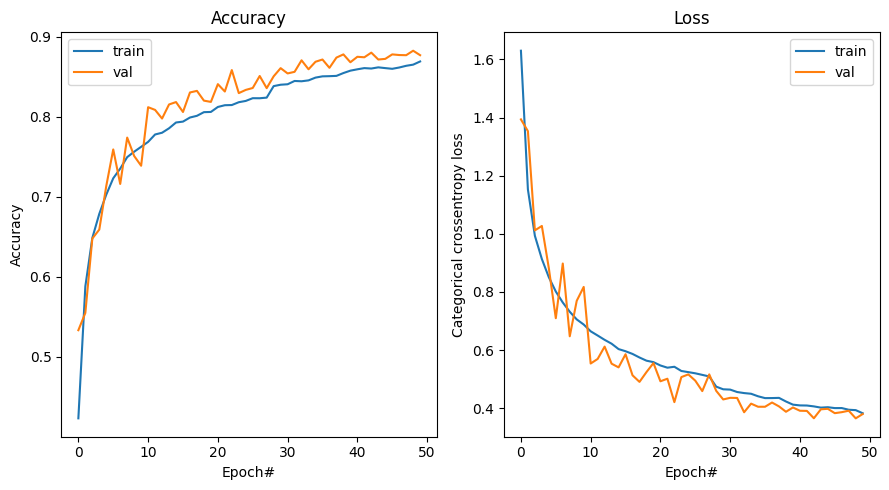

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9251 - loss: 0.2134
Total loss on training set: 0.21786539256572723
Accuracy of training set: 0.9233199954032898
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8864 - loss: 0.3488
Total loss on validation set: 0.3652670085430145
Accuracy of validation set: 0.8827999830245972
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8882 - loss: 0.3375
Total loss on test set: 0.33965516090393066
Accuracy of test set: 0.8830000162124634
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
The accuracy using the test set: 0.883
The confusion matrix using the test set:
 [[471   5   9   4   2   0   0   2  10   9]
 [  0 470   0   0   0   0   1   0   2  22]
 [ 19   2 397  11  12  15  24   3   2   3]
 [  8   3  13 350  24  46  38   4   4  13]
 [  6   0  15   4 431   2  25  10   0   0]
 [  3   0   6  46  11 408  17  16   0   5]
 [  2   1   1   3   2   0 497   0   2   1]
 [  5   0   3   5  18   3   9 459   0   3]
 [ 12   6   0   2   0   0   1   0

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, Activation, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Fixed import
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import os

# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
num_classes = 10
y_train_c = to_categorical(y_train, num_classes)
y_test_c = to_categorical(y_test, num_classes)
classes = [f'class_{i}' for i in range(num_classes)]

# Split test set into validation and test sets (5000 each)
x_val = x_test[:5000]
y_val_c = y_test_c[:5000]
x_test = x_test[5000:]
y_test_c = y_test_c[5000:]

# Verify data shapes
print('x_train shape:', x_train.shape)
print('y_train_c shape:', y_train_c.shape)
print('x_val shape:', x_val.shape)
print('y_val_c shape:', y_val_c.shape)
print('x_test shape:', x_test.shape)
print('y_test_c shape:', y_test_c.shape)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Plotting function
def plot_curve(accuracy_train, loss_train, accuracy_val, loss_val):
    epochs = np.arange(len(loss_train))
    plt.figure(figsize=[9, 5])

    plt.subplot(1, 2, 1)
    plt.plot(epochs, accuracy_train, label='train')
    plt.plot(epochs, accuracy_val, label='val')
    plt.xlabel('Epoch#')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss_train, label='train')
    plt.plot(epochs, loss_val, label='val')
    plt.xlabel('Epoch#')
    plt.ylabel('Categorical crossentropy loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define the improved model
model_a = Sequential()

# First convolutional block
model_a.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(32, (3, 3), padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.2))

# Second convolutional block
model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(64, (3, 3), padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.3))

# Third convolutional block (new)
model_a.add(Conv2D(128, (3, 3), padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Conv2D(128, (3, 3), padding='same'))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(MaxPooling2D(pool_size=(2, 2)))
model_a.add(Dropout(0.4))

# Flatten and dense layers
model_a.add(Flatten())
model_a.add(Dense(512))
model_a.add(BatchNormalization())
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))
model_a.add(Dense(units=num_classes))
model_a.add(Activation('softmax'))
model_a.summary()

# Compile the model
model_a.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Model checkpoint, early stopping, and learning rate scheduler
save_path = 'model_a_improved.h5'
save_dir = os.path.dirname(save_path)
if save_dir:
    os.makedirs(save_dir, exist_ok=True)
callbacks_save = ModelCheckpoint(save_path, monitor='val_loss', verbose=0, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model with data augmentation
history = model_a.fit(datagen.flow(x_train, y_train_c, batch_size=32),
                      epochs=50,
                      validation_data=(x_val, y_val_c),
                      callbacks=[callbacks_save, early_stopping, lr_scheduler],
                      verbose=1)

# Plot training curves
acc_curve_train = np.array(history.history['accuracy'])
loss_curve_train = np.array(history.history['loss'])
acc_curve_val = np.array(history.history['val_accuracy'])
loss_curve_val = np.array(history.history['val_loss'])
plot_curve(acc_curve_train, loss_curve_train, acc_curve_val, loss_curve_val)

# Load the best model
model_a = tf.keras.models.load_model(save_path)

# Evaluate on training set
score = model_a.evaluate(x_train, y_train_c)
print('Total loss on training set:', score[0])
print('Accuracy of training set:', score[1])

# Evaluate on validation set
score = model_a.evaluate(x_val, y_val_c)
print('Total loss on validation set:', score[0])
print('Accuracy of validation set:', score[1])

# Evaluate on test set
score = model_a.evaluate(x_test, y_test_c)
print('Total loss on test set:', score[0])
print('Accuracy of test set:', score[1])

# Additional metrics on test set
y_test_pred = model_a.predict(x_test)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true = np.argmax(y_test_c, axis=1)
print('The accuracy using the test set:', accuracy_score(y_test_true, y_test_pred_classes))
print('The confusion matrix using the test set:\n', confusion_matrix(y_test_true, y_test_pred_classes))
print('The recall using the test set:', recall_score(y_test_true, y_test_pred_classes, average='weighted'))